In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/jobathon-may-2021-credit-card-lead-prediction/sample_submission.csv
/kaggle/input/jobathon-may-2021-credit-card-lead-prediction/train.csv
/kaggle/input/jobathon-may-2021-credit-card-lead-prediction/test.csv


# **WORKING WITH IMBALANCE DATA**

**Python · JOB-A-THON - May 2021- Credit Card Lead Prediction**

Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

This dataset was part of May 2021 Jobathon conducted my analytics vidhya, for more info check:https://datahack.analyticsvidhya.com/contest/job-a-thon-2/

**Data columns**
ID :- Unique Identifier for a row

Gender :- Gender of the Customer

Age :- Age of the Customer (in Years)

Region_Code :- Code of the Region for the customers

Occupation :- Occupation Type for the customer

Channel_Code :- Acquisition Channel Code for the Customer (Encoded)

Vintage :- Vintage for the Customer (In Months)

Credit_Product :- If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

AvgAccountBalance :- Average Account Balance for the Customer in last 12 Months

Is_Active :- If the Customer is Active in last 3 Months

**Target**
**Is_Lead :- If the Customer is interested for the Credit Card
0 : Customer is not interested
1 : Customer is interested**

**OBJECTIVE: 
To build a predictive model that will be able to classify customers who will show a higher intent towards a credit card.**

**This is a binary classification problem considering our target column which has two possibilities, a possible lead customer and not a possible lead.We are going to build a binary classification model to solve this problem.
This is going to be an end to end classification machine learning model for this problem.**

# **1. Importation of libraries to be used in this project**

In [2]:
#importation of data manipulation, plotting and grid formating Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#importing feature engineering and preprocessing modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing Classifier Modules
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

#metrics evaluation Modules
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve,roc_auc_score
from sklearn.metrics import f1_score,auc

import warnings
warnings.filterwarnings("ignore")


In [3]:
#Reading in the data
train = pd.read_csv('/kaggle/input/jobathon-may-2021-credit-card-lead-prediction/train.csv')
test = pd.read_csv('/kaggle/input/jobathon-may-2021-credit-card-lead-prediction/test.csv')

**2. DATA INSPECTION,PREPARATION AND FORMATTING**

In [4]:
#size of train and test data respectively
train.shape, test.shape

((245725, 11), (105312, 10))

In [5]:
#snapshot of data
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


From the code above, we can deduce: 
1. We have 7 variables of type object(categorical columns) and 4 numerical columns
2. We have one column of credit_product with missing values
3. We have a total of 10 variables to act as our predictor variables and one target variable Is_lead.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


The test dataset also has some missing values in the Credit product column. we shall fill in these missing values as well

In [9]:
#checking for dupliated rows
train.duplicated().sum()

0

In [10]:
#snapshot at numerical variables
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [11]:
#select numerical predictor variables
num_cols = ['Age','Vintage','Avg_Account_Balance']
num_data=train[num_cols]

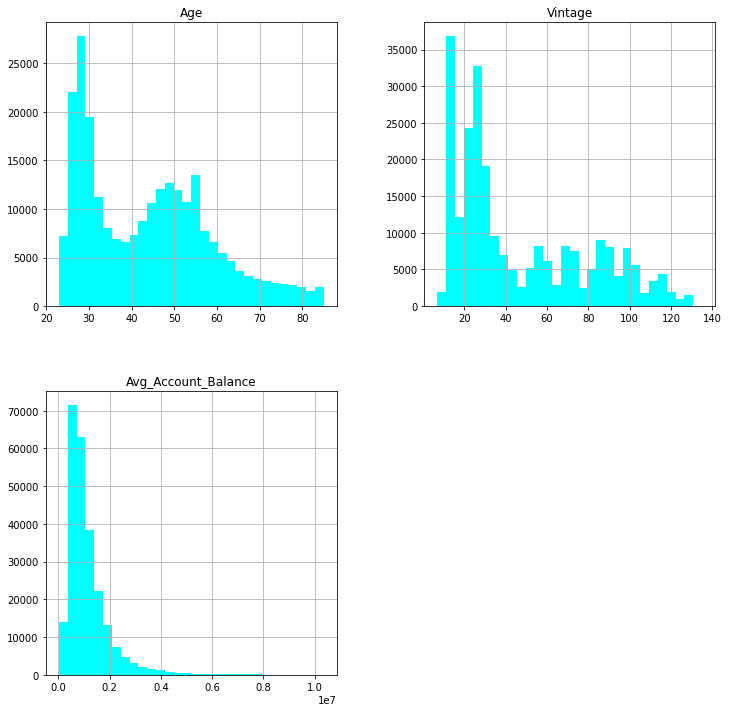

In [12]:
# Plotting histograms plots for the variables
num_data.hist(bins=30, color = 'cyan',figsize=(12,12))
plt.show()

In [13]:
#snapshot at the categorical columns
train.describe(include='O')

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,NNVBBKZB,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


We can see that there are no repeated IDs in the ID variable,the  gender with the highest frequency is male,and that the highest number of it's clients are self employed among other factors that can be noted.

In [14]:
#A look the target variable
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

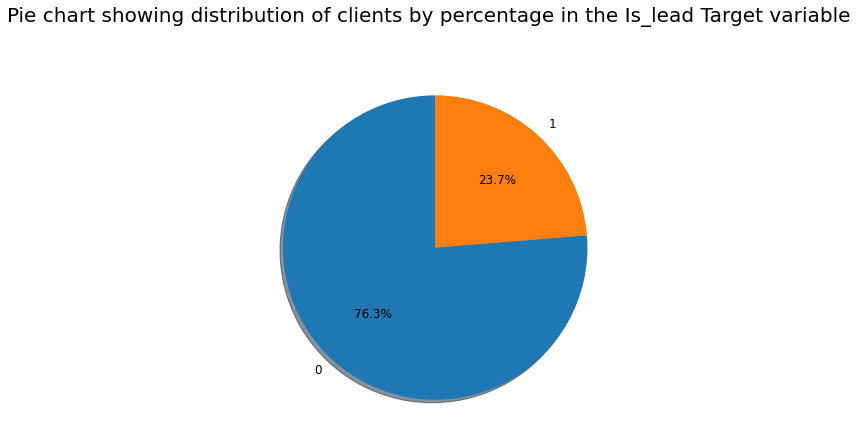

In [15]:
plt.suptitle('Pie chart showing distribution of clients by percentage in the Is_lead Target variable', fontsize=20)
train['Is_Lead'].value_counts().plot(kind='pie',autopct="%.1f%%",shadow=True,startangle=90,figsize=(7,7), fontsize=12,ylabel='')
plt.show()

We can see that there is a class imbalance between the Is_lead and No_lead labels. Those are who are no leads are more than twice as many as those who are have been labeled as Yes leads. This class imbalance will be highly taken into consideration when modelling.

In [16]:
train_labels = train['Is_Lead']

# **3. EXPLANATORY DATA ANALYSIS**

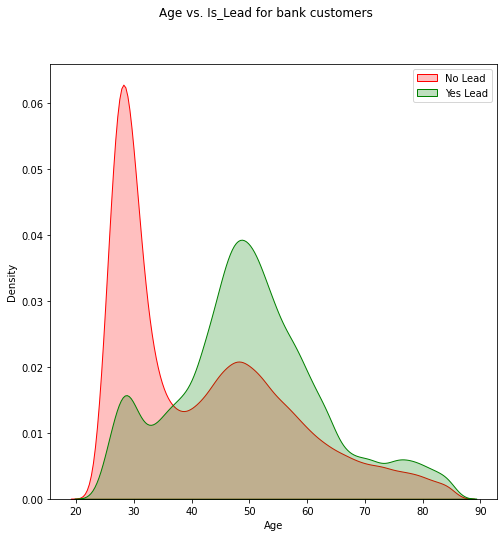

In [17]:
#Plot of probabbilty density function Age vs Is_lead for bank customers
fig, ax = plt.subplots(figsize=(8,8))

sns.kdeplot(train[train["Is_Lead"]==0]["Age"],shade=True, color="red", label="No Lead", ax=ax)
sns.kdeplot(train[train["Is_Lead"]==1]["Age"],shade=True, color="green", label="Yes Lead",ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Is_Lead for bank customers")
ax.legend();


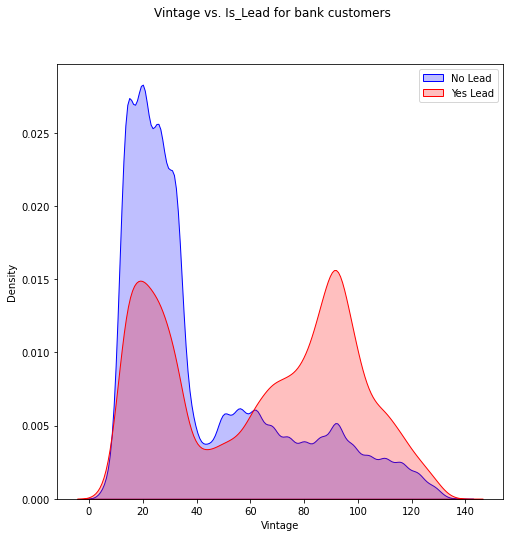

In [18]:
#Plot of probabbilty density function Vintage vs Is_lead for bank customers
fig, ax = plt.subplots(figsize=(8,8))

sns.kdeplot(train[train["Is_Lead"]==0]["Vintage"],shade=True, color="blue", label="No Lead", ax=ax)
sns.kdeplot(train[train["Is_Lead"]==1]["Vintage"],shade=True, color="red", label="Yes Lead",ax=ax)

ax.set_xlabel("Vintage")
ax.set_ylabel("Density")

fig.suptitle("Vintage vs. Is_Lead for bank customers")
ax.legend();

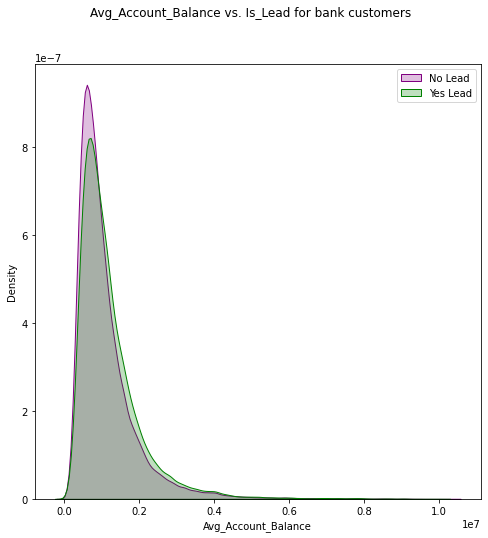

In [19]:
#Plot of probabbilty density function Avg_Account_Balance vs Is_lead for bank customers
fig, ax = plt.subplots(figsize=(8,8))

sns.kdeplot(train[train["Is_Lead"]==0]["Avg_Account_Balance"],shade=True, color="purple", label="No Lead", ax=ax)
sns.kdeplot(train[train["Is_Lead"]==1]["Avg_Account_Balance"],shade=True, color="green", label="Yes Lead",ax=ax)

ax.set_xlabel("Avg_Account_Balance")
ax.set_ylabel("Density")

fig.suptitle("Avg_Account_Balance vs. Is_Lead for bank customers")
ax.legend();

From the graphs above, it can be observed that the most variation between the distributions are those between target variable and age, target variable and vintage while the variations in the distribution between the target variable and the ave_account_balance is minimum.

Lets explore the relationship between categorical variables and the target variable.

In [20]:
cat_data = train.select_dtypes(exclude=[np.number])
print(list(cat_data.columns))

['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']


In [21]:
train.groupby(['Gender','Is_Lead']).ID.count()

Gender  Is_Lead
Female  0          88823
        1          22705
Male    0          98614
        1          35583
Name: ID, dtype: int64

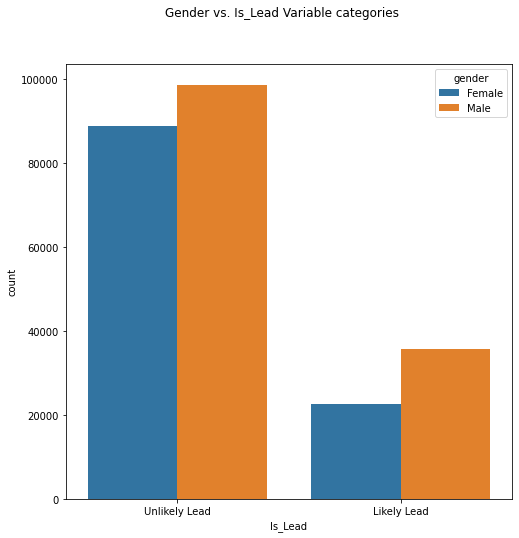

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Is_Lead", hue="Gender", data=train,ax=ax)
ax.legend(title="gender")
ax.set_xticklabels(["Unlikely Lead", "Likely Lead"])
ax.set_xlabel("Is_Lead")
fig.suptitle("Gender vs. Is_Lead Variable categories");

In [23]:
#Has many unique values
train['Region_Code'].nunique()

35

In [24]:
train.groupby(['Region_Code','Is_Lead']).ID.count()

Region_Code  Is_Lead
RG250        0           2103
             1            393
RG251        0           4569
             1           1381
RG252        0           3694
                        ...  
RG282        1           1120
RG283        0          20531
             1           8885
RG284        0          13504
             1           5816
Name: ID, Length: 70, dtype: int64

In [25]:
train.groupby(['Occupation','Is_Lead']).ID.count()

Occupation     Is_Lead
Entrepreneur   0            905
               1           1762
Other          0          52984
               1          17189
Salaried       0          60503
               1          11496
Self_Employed  0          73045
               1          27841
Name: ID, dtype: int64

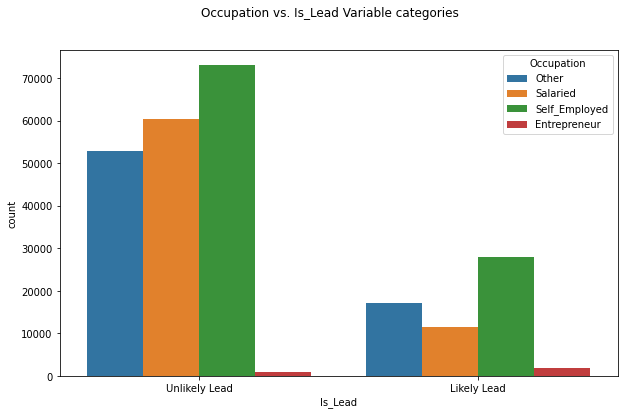

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="Is_Lead", hue="Occupation", data=train,ax=ax)
ax.legend(title="Occupation")
ax.set_xticklabels(["Unlikely Lead", "Likely Lead"])
ax.set_xlabel("Is_Lead")
fig.suptitle("Occupation vs. Is_Lead Variable categories");

In [27]:
train.groupby(['Channel_Code','Is_Lead']).ID.count()

Channel_Code  Is_Lead
X1            0          94236
              1           9482
X2            0          45519
              1          22207
X3            0          43493
              1          25219
X4            0           4189
              1           1380
Name: ID, dtype: int64

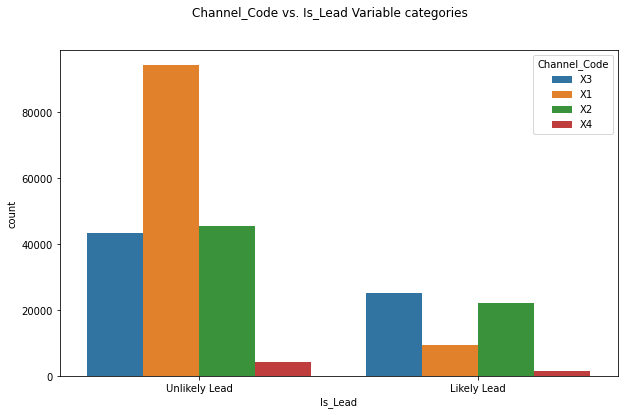

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="Is_Lead", hue="Channel_Code", data=train,ax=ax)
ax.legend(title="Channel_Code")
ax.set_xticklabels(["Unlikely Lead", "Likely Lead"])
ax.set_xlabel("Is_Lead")
fig.suptitle("Channel_Code vs. Is_Lead Variable categories");

In [29]:
train.groupby(['Credit_Product','Is_Lead']).ID.count()

Credit_Product  Is_Lead
No              0          133734
                1           10623
Yes             0           49353
                1           22690
Name: ID, dtype: int64

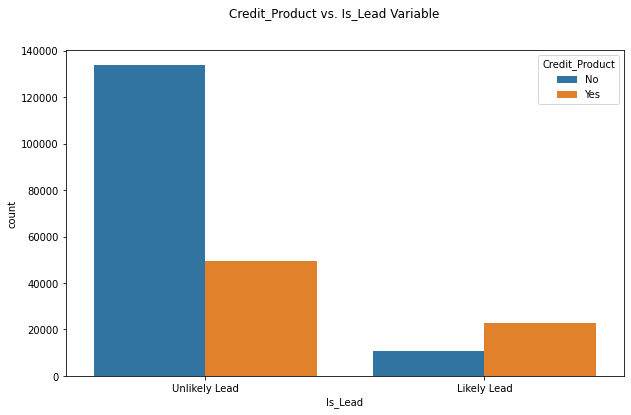

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="Is_Lead", hue="Credit_Product", data=train,ax=ax)
ax.legend(title="Credit_Product")
ax.set_xticklabels(["Unlikely Lead", "Likely Lead"])
ax.set_xlabel("Is_Lead")
fig.suptitle("Credit_Product vs. Is_Lead Variable ");

In [31]:
train.groupby(['Is_Active','Is_Lead']).ID.count()

Is_Active  Is_Lead
No         0          119007
           1           31283
Yes        0           68430
           1           27005
Name: ID, dtype: int64

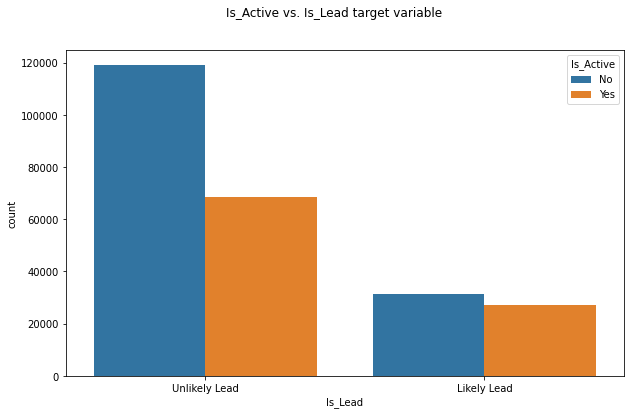

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="Is_Lead", hue="Is_Active", data=train,ax=ax)
ax.legend(title="Is_Active")
ax.set_xticklabels(["Unlikely Lead", "Likely Lead"])
ax.set_xlabel("Is_Lead")
fig.suptitle("Is_Active vs. Is_Lead target variable ");

Considering the visualizations above, it can be concluded that there are some visible relationships between the target variable and the categorical variables.

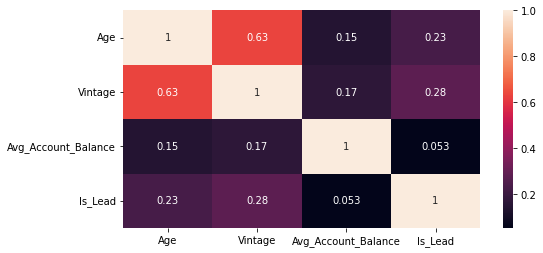

In [33]:
#select the numerical columns
num_data=train.loc[:,train.dtypes!=np.object]
# heat map of correlation of features
correlation_matrix = num_data.corr()
fig = plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix,vmax=1,annot=True) 
plt.show()

Since avg_Account_Balance appears to have a very low correlation to the target compared to the age and vintage, we shall not consider it in the feature engineering phase.we shall consider Age and Vintage in feature engineering

# **3. FEATURE ENGINEERING AND SELECTION PHASE.**

In [34]:
# Make a new dataframe for polynomial features
poly_features = train[['Age', 'Vintage', 'Is_Lead']]
poly_features_test = test[['Age', 'Vintage']]

poly_target = poly_features['Is_Lead']

poly_features = poly_features.drop(columns = ['Is_Lead'])

                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3,include_bias=False)

In [35]:
# Train the polynomial features
poly_features=poly_transformer.fit_transform(poly_features)

# Transform the test features
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)
print('Polynomial Features shape: ', poly_features_test.shape)

Polynomial Features shape:  (245725, 9)
Polynomial Features shape:  (105312, 9)


In [36]:
#This creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.
print(list(poly_transformer.get_feature_names(input_features = ['Age', 'Vintage'])[:9]))

['Age', 'Vintage', 'Age^2', 'Age Vintage', 'Vintage^2', 'Age^3', 'Age^2 Vintage', 'Age Vintage^2', 'Vintage^3']


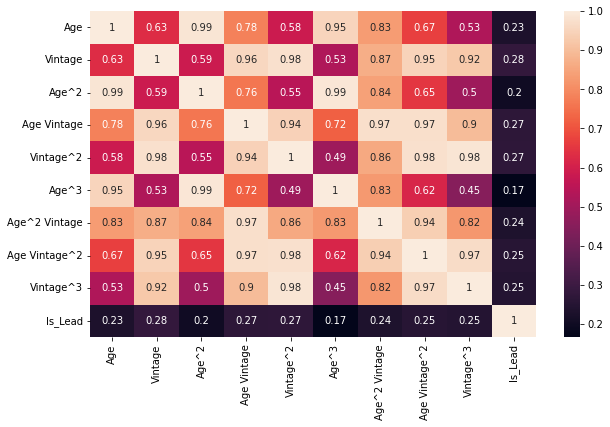

In [37]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['Age', 'Vintage']))

# Add in the target
poly_features['Is_Lead'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()
fig = plt.figure(figsize=(10,6))
sns.heatmap(poly_corrs,vmax=1,annot=True) 
plt.show()

In [38]:
poly_features.head()

,Age,Vintage,Age^2,Age Vintage,Vintage^2,Age^3,Age^2 Vintage,Age Vintage^2,Vintage^3,Is_Lead
0,73.0,43.0,5329.0,3139.0,1849.0,389017.0,229147.0,134977.0,79507.0,0
1,30.0,32.0,900.0,960.0,1024.0,27000.0,28800.0,30720.0,32768.0,0
2,56.0,26.0,3136.0,1456.0,676.0,175616.0,81536.0,37856.0,17576.0,0
3,34.0,19.0,1156.0,646.0,361.0,39304.0,21964.0,12274.0,6859.0,0
4,30.0,33.0,900.0,990.0,1089.0,27000.0,29700.0,32670.0,35937.0,0


In [39]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['Age', 'Vintage']))

In [40]:
poly_features_test.head()

,Age,Vintage,Age^2,Age Vintage,Vintage^2,Age^3,Age^2 Vintage,Age Vintage^2,Vintage^3
0,29.0,25.0,841.0,725.0,625.0,24389.0,21025.0,18125.0,15625.0
1,43.0,49.0,1849.0,2107.0,2401.0,79507.0,90601.0,103243.0,117649.0
2,31.0,14.0,961.0,434.0,196.0,29791.0,13454.0,6076.0,2744.0
3,29.0,33.0,841.0,957.0,1089.0,24389.0,27753.0,31581.0,35937.0
4,29.0,19.0,841.0,551.0,361.0,24389.0,15979.0,10469.0,6859.0


In [41]:
# Merge polynomial features into training dataframe
poly_features['ID'] = train['ID']
train_poly = train.merge(poly_features, on = 'ID', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['ID'] = test['ID']
test_poly = test.merge(poly_features_test, on = 'ID', how = 'left')

In [42]:
train_poly.shape, test_poly.shape

((245725, 21), (105312, 19))

In [43]:
# Align the training and testing data, keeps only columns present in both dataframes
# Align the dataframes
train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)

In [44]:
train_poly.shape, test_poly.shape

((245725, 19), (105312, 19))

In [45]:
#columns to drop before  modelling 
cols_to_drop= ['ID','Region_Code']

In [46]:
train = train_poly.drop(columns=cols_to_drop,axis=1)
testing = test_poly.drop(columns=cols_to_drop,axis=1).copy()

In [47]:
# combining  train and test dataset for preprocessing
data_combined = [train, testing]

In [48]:
for dataset in data_combined:
    dataset.Credit_Product.fillna(value='No',inplace=True)

In [49]:
#Shows that there are nolonger null values in the train set.
train['Credit_Product'].isnull().sum()

0

In [50]:
#Shows that there are nolonger null values in the test set as well.
testing['Credit_Product'].isnull().sum()

0

In [51]:
#selection of categorical variables from the dataset
cat_cols = [cname for cname in dataset.columns 
                    if  dataset[cname].dtype == "object"]

In [52]:
train= pd.get_dummies(train,columns=cat_cols,drop_first=True)
testing= pd.get_dummies(testing,columns=cat_cols,drop_first=True)

In [53]:
train.head()

,Age_x,Vintage_x,Avg_Account_Balance,Age_y,Vintage_y,Age^2,Age Vintage,Vintage^2,Age^3,Age^2 Vintage,...,Vintage^3,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,73.0,43.0,5329.0,3139.0,1849.0,389017.0,229147.0,...,79507.0,0,1,0,0,0,1,0,0,0
1,30,32,581988,30.0,32.0,900.0,960.0,1024.0,27000.0,28800.0,...,32768.0,0,0,1,0,0,0,0,0,0
2,56,26,1484315,56.0,26.0,3136.0,1456.0,676.0,175616.0,81536.0,...,17576.0,0,0,0,1,0,1,0,0,1
3,34,19,470454,34.0,19.0,1156.0,646.0,361.0,39304.0,21964.0,...,6859.0,1,0,1,0,0,0,0,0,0
4,30,33,886787,30.0,33.0,900.0,990.0,1089.0,27000.0,29700.0,...,35937.0,0,0,1,0,0,0,0,0,0


In [54]:
testing.head()

,Age_x,Vintage_x,Avg_Account_Balance,Age_y,Vintage_y,Age^2,Age Vintage,Vintage^2,Age^3,Age^2 Vintage,...,Vintage^3,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,29,25,742366,29.0,25.0,841.0,725.0,625.0,24389.0,21025.0,...,15625.0,1,1,0,0,0,0,0,1,0
1,43,49,925537,43.0,49.0,1849.0,2107.0,2401.0,79507.0,90601.0,...,117649.0,1,1,0,0,1,0,0,0,0
2,31,14,215949,31.0,14.0,961.0,434.0,196.0,29791.0,13454.0,...,2744.0,1,0,1,0,0,0,0,0,0
3,29,33,868070,29.0,33.0,841.0,957.0,1089.0,24389.0,27753.0,...,35937.0,1,1,0,0,0,0,0,0,0
4,29,19,657087,29.0,19.0,841.0,551.0,361.0,24389.0,15979.0,...,6859.0,0,1,0,0,0,0,0,0,0


Lets preprocess the numerical features in both datasets..
we are going to standardize the features for better performance during the modeling phase

In [55]:
#Select numerical columns
num_cols = [cname for cname in dataset.columns 
            if dataset[cname].dtype in ['int64', 'float64']]

In [56]:
#define the scaler object
scaler = StandardScaler()

# scale and transform numeric features n
train[num_cols] = scaler.fit_transform(train[num_cols])
testing[num_cols] = scaler.transform(testing[num_cols])

In [57]:
#final training features
train.head()

,Age_x,Vintage_x,Avg_Account_Balance,Age_y,Vintage_y,Age^2,Age Vintage,Vintage^2,Age^3,Age^2 Vintage,...,Vintage^3,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,1.965365,-0.122373,-0.096968,1.965365,-0.122373,2.187384,0.364447,-0.354200,2.323265,0.691047,...,-0.448740,0,1,0,0,0,1,0,0,0
1,-0.934429,-0.462372,-0.640630,-0.934429,-0.462372,-0.853648,-0.657987,-0.562496,-0.749487,-0.681575,...,-0.554527,0,0,1,0,0,0,0,0,0
2,0.818935,-0.647825,0.417279,0.818935,-0.647825,0.681630,-0.425253,-0.650359,0.511946,-0.320269,...,-0.588911,0,0,0,1,0,1,0,0,1
3,-0.664680,-0.864188,-0.771395,-0.664680,-0.864188,-0.677874,-0.805322,-0.729890,-0.645052,-0.728410,...,-0.613168,1,0,1,0,0,0,0,0,0
4,-0.934429,-0.431463,-0.283276,-0.934429,-0.431463,-0.853648,-0.643910,-0.546085,-0.749487,-0.675409,...,-0.547354,0,0,1,0,0,0,0,0,0


In [58]:
#final test features
testing.head()

,Age_x,Vintage_x,Avg_Account_Balance,Age_y,Vintage_y,Age^2,Age Vintage,Vintage^2,Age^3,Age^2 Vintage,...,Vintage^3,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,-1.001866,-0.678734,-0.452599,-1.001866,-0.678734,-0.894158,-0.768254,-0.663235,-0.771649,-0.734843,...,-0.593327,1,1,0,0,0,0,0,1,0
1,-0.057747,0.063081,-0.237845,-0.057747,0.063081,-0.202047,-0.119790,-0.214831,-0.303814,-0.258163,...,-0.362412,1,1,0,0,1,0,0,0,0
2,-0.866992,-1.018733,-1.069782,-0.866992,-1.018733,-0.811764,-0.904797,-0.771549,-0.725797,-0.786714,...,-0.622481,1,0,1,0,0,0,0,0,0
3,-1.001866,-0.431463,-0.305220,-1.001866,-0.431463,-0.894158,-0.659394,-0.546085,-0.771649,-0.688748,...,-0.547354,1,1,0,0,0,0,0,0,0
4,-1.001866,-0.864188,-0.552582,-1.001866,-0.864188,-0.894158,-0.849898,-0.729890,-0.771649,-0.769415,...,-0.613168,0,1,0,0,0,0,0,0,0


In [59]:
#splitting the data to create validation splits.
#stratified sampling ensures the even distribution of classes of the target variable.
X_train , X_val , y_train , y_val = train_test_split(train,train_labels,test_size = 0.2, random_state = 1, stratify=train_labels)

In [60]:
X_train.shape , y_train.shape, X_val.shape,y_val.shape

((196580, 21), (196580,), (49145, 21), (49145,))

# **4. MODEL SELECTION AND TRAINING**

We shall not use the train accuracy for evaulating our models here since it's not so informative in an imbalanced dataset like the one we are dealing with here

In [61]:
#Function to train and evaulate a given model
def fit_Evaulate(model,X_train,y_train):
    
    model.fit(X_train, y_train)
    y_pred=model.predict_proba(X_val)[:,1]#predict and retrieve probabilities for positive class
    y_pred2 = model.predict(X_val)# predict class values
    auc = roc_auc_score(y_val, y_pred)
    confusion = confusion_matrix(y_val,y_pred2)
    f_score = f1_score(y_val,y_pred2)
    
    return auc,confusion,f_score

In [62]:
#train and make  a preduction using a dumpy classifier
from sklearn.dummy import DummyClassifier
model = DummyClassifier()
dummy_auc,Dammy_confusion,f_score_dummy = fit_Evaulate(model,X_train,y_train)
print("Model performance metric report:")
print('The dummy ROC AUC for validation data: ROC AUC=%.3f' %(dummy_auc))
print('The harmonic mean of  the dumy classifier, f1_score {:.2f}'.format(f_score_dummy))

Model performance metric report:
The dummy ROC AUC for validation data: ROC AUC=0.500
The harmonic mean of  the dumy classifier, f1_score 0.25


In [63]:
RF_clf = RandomForestClassifier(class_weight="balanced",random_state=3)
RF_auc,RF_confusion,f_score_RF = fit_Evaulate(RF_clf,X_train,y_train)
print("Model performance metric report:")
print('Random Forest ROC AUC for vaalidation data: ROC AUC=%.2f' %(RF_auc))
print('The harmonic mean for the Random forest Classifier, f1_score : {:.2f}'.format(f_score_RF))

Model performance metric report:
Random Forest ROC AUC for vaalidation data: ROC AUC=0.72
The harmonic mean for the Random forest Classifier, f1_score : 0.39


In [64]:
GB_clf = GradientBoostingClassifier(random_state=2)
GB_auc,GB_confusion,f_score_GB = fit_Evaulate(GB_clf,X_train,y_train)
print("Model performance metric report:")
print('Gradient Boosting ROC AUC for validation data: ROC AUC=%.2f' %(GB_auc))
print('The harmonic mean for the Random forest Classifier, f1_score : {:.2f}'.format(f_score_GB))

Model performance metric report:
Gradient Boosting ROC AUC for validation data: ROC AUC=0.78
The harmonic mean for the Random forest Classifier, f1_score : 0.33


In [65]:
XGB_clf = XGBClassifier(random_state=4)
XGB_auc,XGB_confusion,f_score_XGB = fit_Evaulate(XGB_clf,X_train,y_train)
print("Model performance metric report:")
print('Gradient Boosting ROC AUC for validation data: ROC AUC=%.2f' %(XGB_auc))
print('The harmonic mean for the XGB Classifier, f1_score : {:.2f}'.format(f_score_XGB))

[07:59:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model performance metric report:
Gradient Boosting ROC AUC for validation data: ROC AUC=0.78
The harmonic mean for the XGB Classifier, f1_score : 0.38


In [66]:
print("\n The Dammy class matrix  \n {} ".format(Dammy_confusion))
print("\n The Random Forest confusion matrix  \n {} ".format(RF_confusion))
print("\n The Gradient Boosting confusion matrix  \n {} ".format(GB_confusion))
print("\n The XGBClassifier confusion matrix   \n {}".format(XGB_confusion))


 The Dammy class matrix  
 [[28778  8709]
 [ 8806  2852]] 

 The Random Forest confusion matrix  
 [[32543  4944]
 [ 7643  4015]] 

 The Gradient Boosting confusion matrix  
 [[36340  1147]
 [ 9143  2515]] 

 The XGBClassifier confusion matrix   
 [[35713  1774]
 [ 8477  3181]]


# **5. Evaluation and interpretation**

**It can be observed that the random forest model had the better results in the confusion matrix for the positive class. It has identified more True postives than the rest of the models**

In [67]:
#taking the model that had better results being the random forest model and fitting it
model = RandomForestClassifier(class_weight="balanced",random_state=3)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=3)

Gradient Boosting metrics: f1=0.389 auc=0.475


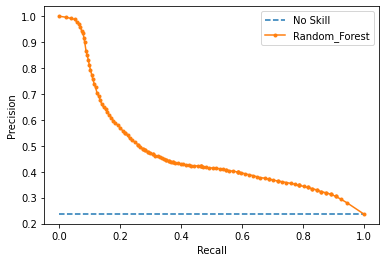

In [68]:
# precision-recall curve and f1 for an imbalanced dataset using the random forest model 
y_pred=model.predict_proba(X_val)[:,1]#predict and retrieve probabilities for positive class
#The F-Measure can be calculated by calling the f1_score() function 
#that takes the true class values and the predicted class values as arguments.

y_pred2 = model.predict(X_val)# predict class values
# calculate precision and recall for each threshold
rf_precision, rf_recall, _ = precision_recall_curve(y_val, y_pred)
# calculate scores
rf_f1, rf_auc = f1_score(y_val, y_pred2), auc(rf_recall, rf_precision)
# summarize scores
print('Gradient Boosting metrics: f1=%.3f auc=%.3f' % (rf_f1,rf_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall,rf_precision, marker='.', label='Random_Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [69]:
#classification report at the defualt threshold of 0.5 for the positive class
y_pred = np.where(y_pred > 0.5, 1,0)
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84     37487
           1       0.45      0.34      0.39     11658

    accuracy                           0.74     49145
   macro avg       0.63      0.61      0.61     49145
weighted avg       0.72      0.74      0.73     49145



In [70]:
#sample prediction for the first 10 data points
y_pred[:10] 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Since we are interested in having a higher recall that is , identifying all the potential Is_lead clients who may also include some false positives. It's important for us to have higher recall since it's an imbalanced data set for our business case here and that we need to therefore identify  all the positive cases(all is lead customers). we shall threshold the probabilities from the default 0.5 for the positive class to 0.2.**

In [71]:
#evaluate the model on the performance of the validation set
y_pred=model.predict_proba(X_val)[:,1]
y_pred = np.where(y_pred > 0.2, 1,0)
print(classification_report(y_val,y_pred))# summary of all the three metrics

              precision    recall  f1-score   support

           0       0.86      0.67      0.75     37487
           1       0.38      0.65      0.48     11658

    accuracy                           0.67     49145
   macro avg       0.62      0.66      0.62     49145
weighted avg       0.75      0.67      0.69     49145



In [72]:
#sample prediction for the first 10 data points
y_pred[:10] 

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [73]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.0411 ± 0.0032,Occupation_Salaried
0.0251 ± 0.0018,Occupation_Self_Employed
0.0106 ± 0.0016,Channel_Code_X2
0.0099 ± 0.0012,Is_Active_Yes
0.0078 ± 0.0017,Credit_Product_Yes
0.0012 ± 0.0021,Avg_Account_Balance
0.0003 ± 0.0017,Gender_Male
0.0001 ± 0.0007,Occupation_Other
-0.0006 ± 0.0003,Channel_Code_X4
-0.0031 ± 0.0012,Channel_Code_X3


**It can be observed that the three most important features that the model considered in classifying which customers are credit card lead and which are not were occupation_salaried, occupation_self_employed and channel code**

In [74]:
#evaluate the model on the performance of the test set
y_pred_test=model.predict_proba(testing)[:,1]
y_pred_test = np.where(y_pred_test > 0.2, 1,0)

In [75]:
#Create a submission file on Kaggle
Submit = pd.DataFrame({
        "ID": test["ID"],
        "Is_Lead": y_pred_test
    })

Submit.to_csv('Submit.csv', index=False)

In [76]:
Submit.head(10).set_index('ID')

,Is_Lead
ID,
VBENBARO,0
CCMEWNKY,0
VK3KGA9M,0
TT8RPZVC,0
SHQZEYTZ,0
MZZAQMPT,1
Y88TW36I,0
3UGOAQNU,0
VVUKMUJT,1


This notebook is still a work in  progress, i will be updating it as soon as i have time
**please!you can upvote for this note book if you find it insightful.**